## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems

In [1]:
%matplotlib notebook

from imports import *

print('cuda' if torch.cuda.is_available() else 'cpu')

cuda


# Figures 1 + 2: Compare Image Fidelity for Different Algorithms and Compare PSNR over time using NLM

In [2]:
main_problem = create_problem(noise_est=0.8, H=256, W=256, sigma=5, filter_decay=0.999)

In [17]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(main_problem, 'nlm', eta=2000, T1=1000, T2=5, mini_batch_size=50, verbose=True)

After gradient update: 0 0 17.92991608035559
After denoising update: 0 0 17.956364690113855
After gradient update: 0 1 18.100266581239485
After denoising update: 0 1 18.127171688523386
After gradient update: 0 2 18.244329566347194
After denoising update: 0 2 18.27034826572313
After gradient update: 0 3 18.39655567188752
After denoising update: 0 3 18.421258549893643
After gradient update: 0 4 18.458010512305343
After denoising update: 0 4 18.484791058991405
After gradient update: 1 0 18.61128706731108
After denoising update: 1 0 18.629716563695034
After gradient update: 1 1 18.75114462327671
After denoising update: 1 1 18.76545911893715
After gradient update: 1 2 18.877330266335736
After denoising update: 1 2 18.890770783589716
After gradient update: 1 3 19.004665543149567
After denoising update: 1 3 19.015722354848307
After gradient update: 1 4 19.100007447390134
After denoising update: 1 4 19.114050688943546
After gradient update: 2 0 19.220935002867748
After denoising update: 2 0 19

After denoising update: 17 3 22.58095965129698
After gradient update: 17 4 22.614617061408918
After denoising update: 17 4 22.596215232453098
After gradient update: 18 0 22.631184033631055
After denoising update: 18 0 22.612213248910322
After gradient update: 18 1 22.64684339316258
After denoising update: 18 1 22.627756958154958
After gradient update: 18 2 22.661260421323206
After denoising update: 18 2 22.642537322084117
After gradient update: 18 3 22.67504218218535
After denoising update: 18 3 22.6573740353735
After gradient update: 18 4 22.67374211482407
After denoising update: 18 4 22.664160690971936
After gradient update: 19 0 22.69917775090736
After denoising update: 19 0 22.680010837572205
After gradient update: 19 1 22.71448228781223
After denoising update: 19 1 22.69568439603408
After gradient update: 19 2 22.73005516755701
After denoising update: 19 2 22.711363650299386
After gradient update: 19 3 22.743087492203912
After denoising update: 19 3 22.72581570446478
After gradien

After denoising update: 35 1 23.56165194876894
After gradient update: 35 2 23.588663354722527
After denoising update: 35 2 23.569423013694628
After gradient update: 35 3 23.596583597554925
After denoising update: 35 3 23.577366934212666
After gradient update: 35 4 23.604270848057574
After denoising update: 35 4 23.58511372433208
After gradient update: 36 0 23.611948770670036
After denoising update: 36 0 23.592892809039903
After gradient update: 36 1 23.619610977610023
After denoising update: 36 1 23.60064516011983
After gradient update: 36 2 23.627206560762385
After denoising update: 36 2 23.60825542087848
After gradient update: 36 3 23.63452866442004
After denoising update: 36 3 23.615500444614135
After gradient update: 36 4 23.641547497464988
After denoising update: 36 4 23.623441906591083
After gradient update: 37 0 23.649978475480175
After denoising update: 37 0 23.631105300085757
After gradient update: 37 1 23.657569883367803
After denoising update: 37 1 23.63865783863917
After gr

After denoising update: 52 3 24.128265616128925
After gradient update: 52 4 24.149578314222676
After denoising update: 52 4 24.133778806603445
After gradient update: 53 0 24.154966126181318
After denoising update: 53 0 24.139105817298592
After gradient update: 53 1 24.160262840248997
After denoising update: 53 1 24.14444148275836
After gradient update: 53 2 24.16547893399242
After denoising update: 53 2 24.14966742229414
After gradient update: 53 3 24.17047630515505
After denoising update: 53 3 24.154837288292335
After gradient update: 53 4 24.175729553015486
After denoising update: 53 4 24.160140428913284
After gradient update: 54 0 24.18103675149769
After denoising update: 54 0 24.165365521350477
After gradient update: 54 1 24.186213824796674
After denoising update: 54 1 24.1705770900251
After gradient update: 54 2 24.191303023399623
After denoising update: 54 2 24.17570801663495
After gradient update: 54 3 24.19629446828386
After denoising update: 54 3 24.18077061691097
After gradie

After denoising update: 70 1 24.488804040840012
After gradient update: 70 2 24.505174926504246
After denoising update: 70 2 24.492027380393097
After gradient update: 70 3 24.50830821746878
After denoising update: 70 3 24.495213832365582
After gradient update: 70 4 24.51146914971065
After denoising update: 70 4 24.498374684932624
After gradient update: 71 0 24.5145660774659
After denoising update: 71 0 24.501530829881503
After gradient update: 71 1 24.51769526052931
After denoising update: 71 1 24.504706640643228
After gradient update: 71 2 24.52081590454781
After denoising update: 71 2 24.50788812431344
After gradient update: 71 3 24.52383316459671
After denoising update: 71 3 24.510964140726838
After gradient update: 71 4 24.52699380869774
After denoising update: 71 4 24.51405440968696
After gradient update: 72 0 24.529997806603422
After denoising update: 72 0 24.51713687031942
After gradient update: 72 1 24.532995873869066
After denoising update: 72 1 24.520173916634064
After gradien

After denoising update: 87 3 24.709836510165722
After gradient update: 87 4 24.722164975167914
After denoising update: 87 4 24.711426165626072
After gradient update: 88 0 24.72384633911971
After denoising update: 88 0 24.713274182838717
After gradient update: 88 1 24.72566278497398
After denoising update: 88 1 24.715161695249392
After gradient update: 88 2 24.727499115436764
After denoising update: 88 2 24.71706333315651
After gradient update: 88 3 24.729334110854385
After denoising update: 88 3 24.719042552520758
After gradient update: 88 4 24.731164126298182
After denoising update: 88 4 24.720730347353154
After gradient update: 89 0 24.732971638140103
After denoising update: 89 0 24.72271034305278
After gradient update: 89 1 24.73491444217941
After denoising update: 89 1 24.724714105115684
After gradient update: 89 2 24.73687869297413
After denoising update: 89 2 24.726757297275576
After gradient update: 89 3 24.738782197623532
After denoising update: 89 3 24.728705526717402
After gr

After gradient update: 105 0 24.893313051120213
After denoising update: 105 0 24.88561072769409
After gradient update: 105 1 24.895159215259465
After denoising update: 105 1 24.887493110739165
After gradient update: 105 2 24.897040909614283
After denoising update: 105 2 24.889389587919798
After gradient update: 105 3 24.89885260689111
After denoising update: 105 3 24.8912541543817
After gradient update: 105 4 24.900631430971195
After denoising update: 105 4 24.893143990546168
After gradient update: 106 0 24.902583671010863
After denoising update: 106 0 24.895042596299284
After gradient update: 106 1 24.904429314931775
After denoising update: 106 1 24.896934114566797
After gradient update: 106 2 24.906334421683862
After denoising update: 106 2 24.898850617700283
After gradient update: 106 3 24.908228933941924
After denoising update: 106 3 24.900790802819493
After gradient update: 106 4 24.91013813945387
After denoising update: 106 4 24.902745461183613
After gradient update: 107 0 24.912

After denoising update: 122 1 25.039649980372616
After gradient update: 122 2 25.046920930035217
After denoising update: 122 2 25.04110277477054
After gradient update: 122 3 25.04824479309459
After denoising update: 122 3 25.04247322292691
After gradient update: 122 4 25.04972267098394
After denoising update: 122 4 25.043946366343526
After gradient update: 123 0 25.05114561426863
After denoising update: 123 0 25.04538769275743
After gradient update: 123 1 25.05256652652523
After denoising update: 123 1 25.0468333169065
After gradient update: 123 2 25.053984627582242
After denoising update: 123 2 25.048274835012343
After gradient update: 123 3 25.055365917382932
After denoising update: 123 3 25.049685704358385
After gradient update: 123 4 25.056804536150715
After denoising update: 123 4 25.051184329194136
After gradient update: 124 0 25.058258148068404
After denoising update: 124 0 25.05263393437051
After gradient update: 124 1 25.059680610192594
After denoising update: 124 1 25.0540773

After denoising update: 139 3 25.15736621675828
After gradient update: 139 4 25.1627215528428
After denoising update: 139 4 25.15860674475492
After gradient update: 140 0 25.16396317664785
After denoising update: 140 0 25.159850534113097
After gradient update: 140 1 25.165194468822094
After denoising update: 140 1 25.161096834610746
After gradient update: 140 2 25.16641644956654
After denoising update: 140 2 25.16234332364828
After gradient update: 140 3 25.167645037992692
After denoising update: 140 3 25.16357744638547
After gradient update: 140 4 25.168851530389457
After denoising update: 140 4 25.164819411729642
After gradient update: 141 0 25.17008060081678
After denoising update: 141 0 25.166054554610678
After gradient update: 141 1 25.17130287739933
After denoising update: 141 1 25.167298502973416
After gradient update: 141 2 25.17249530626995
After denoising update: 141 2 25.168494997036053
After gradient update: 141 3 25.173676672750062
After denoising update: 141 3 25.16971721

After gradient update: 157 0 25.26240560958533
After denoising update: 157 0 25.25953311694431
After gradient update: 157 1 25.263499650592095
After denoising update: 157 1 25.26063637795182
After gradient update: 157 2 25.26459642095617
After denoising update: 157 2 25.261738680099576
After gradient update: 157 3 25.265686565075992
After denoising update: 157 3 25.26284533729179
After gradient update: 157 4 25.266775760738682
After denoising update: 157 4 25.263941385944072
After gradient update: 158 0 25.26785336755376
After denoising update: 158 0 25.265026222242955
After gradient update: 158 1 25.26892349105083
After denoising update: 158 1 25.266104996546108
After gradient update: 158 2 25.269990357223442
After denoising update: 158 2 25.26717664394273
After gradient update: 158 3 25.2710570707335
After denoising update: 158 3 25.268259164682977
After gradient update: 158 4 25.272120692880407
After denoising update: 158 4 25.26932258255127
After gradient update: 159 0 25.273166140

After denoising update: 174 1 25.34732856638299
After gradient update: 174 2 25.35028176245623
After denoising update: 174 2 25.348298152534063
After gradient update: 174 3 25.351251477783407
After denoising update: 174 3 25.349263731329263
After gradient update: 174 4 25.352205796240504
After denoising update: 174 4 25.350241729070966
After gradient update: 175 0 25.35316810983644
After denoising update: 175 0 25.35120514101246
After gradient update: 175 1 25.354119371632834
After denoising update: 175 1 25.35216008869941
After gradient update: 175 2 25.355057568341486
After denoising update: 175 2 25.35311122505604
After gradient update: 175 3 25.35601107668458
After denoising update: 175 3 25.354063566922914
After gradient update: 175 4 25.356883397632146
After denoising update: 175 4 25.354945243502208
After gradient update: 176 0 25.357825930141576
After denoising update: 176 0 25.35589938768251
After gradient update: 176 1 25.35877454195714
After denoising update: 176 1 25.356850

After denoising update: 191 3 25.425867008693892
After gradient update: 191 4 25.42810025146683
After denoising update: 191 4 25.426717858708624
After gradient update: 192 0 25.42893566241061
After denoising update: 192 0 25.427563254490316
After gradient update: 192 1 25.42977108457884
After denoising update: 192 1 25.428409962812367
After gradient update: 192 2 25.430601637666577
After denoising update: 192 2 25.429251137824682
After gradient update: 192 3 25.431447302890447
After denoising update: 192 3 25.430096768990165
After gradient update: 192 4 25.432278714770327
After denoising update: 192 4 25.430947058580166
After gradient update: 193 0 25.43313024054957
After denoising update: 193 0 25.43178971543692
After gradient update: 193 1 25.433967280864636
After denoising update: 193 1 25.432632416356014
After gradient update: 193 2 25.434801784133224
After denoising update: 193 2 25.433469945114137
After gradient update: 193 3 25.43563770982244
After denoising update: 193 3 25.434

After gradient update: 209 0 25.49707091348035
After denoising update: 209 0 25.49613822819743
After gradient update: 209 1 25.497829761859116
After denoising update: 209 1 25.496899602596912
After gradient update: 209 2 25.49857950717032
After denoising update: 209 2 25.497654156641282
After gradient update: 209 3 25.499340226480683
After denoising update: 209 3 25.498418554740432
After gradient update: 209 4 25.500069028988456
After denoising update: 209 4 25.499140546641215
After gradient update: 210 0 25.50081001733069
After denoising update: 210 0 25.499893860108614
After gradient update: 210 1 25.501557651952574
After denoising update: 210 1 25.50064697105286
After gradient update: 210 2 25.502307423319337
After denoising update: 210 2 25.501399467946403
After gradient update: 210 3 25.503055050461093
After denoising update: 210 3 25.502150873643302
After gradient update: 210 4 25.5038020078854
After denoising update: 210 4 25.502902795946206
After gradient update: 211 0 25.50454

After denoising update: 226 1 25.557875101599365
After gradient update: 226 2 25.55917096244336
After denoising update: 226 2 25.558525977183013
After gradient update: 226 3 25.559818949021395
After denoising update: 226 3 25.559179946907502
After gradient update: 226 4 25.560465923795714
After denoising update: 226 4 25.55983203516965
After gradient update: 227 0 25.5611150934295
After denoising update: 227 0 25.56048120932321
After gradient update: 227 1 25.561759511456522
After denoising update: 227 1 25.561127839593397
After gradient update: 227 2 25.562404898191403
After denoising update: 227 2 25.561774768706023
After gradient update: 227 3 25.563047813079788
After denoising update: 227 3 25.562418647611196
After gradient update: 227 4 25.563684920906752
After denoising update: 227 4 25.56305778145714
After gradient update: 228 0 25.564321484025967
After denoising update: 228 0 25.563696625842255
After gradient update: 228 1 25.56495726330223
After denoising update: 228 1 25.5643

After denoising update: 243 3 25.609760427760662
After gradient update: 243 4 25.61076046179227
After denoising update: 243 4 25.610312068799203
After gradient update: 244 0 25.61131209231474
After denoising update: 244 0 25.610860831308383
After gradient update: 244 1 25.611857664311266
After denoising update: 244 1 25.611408751151473
After gradient update: 244 2 25.612403162671846
After denoising update: 244 2 25.611955794864603
After gradient update: 244 3 25.612947993964607
After denoising update: 244 3 25.612502064548664
After gradient update: 244 4 25.613494679586534
After denoising update: 244 4 25.61305143111566
After gradient update: 245 0 25.614037159777695
After denoising update: 245 0 25.613596627160007
After gradient update: 245 1 25.614578812315813
After denoising update: 245 1 25.614141171104457
After gradient update: 245 2 25.61512216193948
After denoising update: 245 2 25.614687766662772
After gradient update: 245 3 25.615668022871297
After denoising update: 245 3 25.6

After gradient update: 261 0 25.655198807621993
After denoising update: 261 0 25.654905164714613
After gradient update: 261 1 25.65568454208508
After denoising update: 261 1 25.655391992016657
After gradient update: 261 2 25.65617116670063
After denoising update: 261 2 25.655879098609574
After gradient update: 261 3 25.65665333833225
After denoising update: 261 3 25.656364272049082
After gradient update: 261 4 25.65714168905568
After denoising update: 261 4 25.65685153316991
After gradient update: 262 0 25.657622931391217
After denoising update: 262 0 25.657335134157087
After gradient update: 262 1 25.65810492773784
After denoising update: 262 1 25.657817833071547
After gradient update: 262 2 25.658585391424857
After denoising update: 262 2 25.6583009644778
After gradient update: 262 3 25.65906428205221
After denoising update: 262 3 25.65878210459877
After gradient update: 262 4 25.659543845395106
After denoising update: 262 4 25.659261908674114
After gradient update: 263 0 25.66002227

After denoising update: 278 1 25.693970564575082
After gradient update: 278 2 25.694581705458166
After denoising update: 278 2 25.694396467816404
After gradient update: 278 3 25.695006860332683
After denoising update: 278 3 25.694821902582497
After gradient update: 278 4 25.695427098477786
After denoising update: 278 4 25.695243108217454
After gradient update: 279 0 25.695848414855874
After denoising update: 279 0 25.695665073158423
After gradient update: 279 1 25.696268582738007
After denoising update: 279 1 25.69608652423792
After gradient update: 279 2 25.696686414894884
After denoising update: 279 2 25.696505764796672
After gradient update: 279 3 25.697103681366222
After denoising update: 279 3 25.696925621125747
After gradient update: 279 4 25.697523411001498
After denoising update: 279 4 25.697347815128538
After gradient update: 280 0 25.69794453134771
After denoising update: 280 0 25.69776855563321
After gradient update: 280 1 25.698363671413908
After denoising update: 280 1 25.

After denoising update: 295 3 25.729007165963157
After gradient update: 295 4 25.729481667411733
After denoising update: 295 4 25.729380989094008
After gradient update: 296 0 25.729856129743997
After denoising update: 296 0 25.729756700785135
After gradient update: 296 1 25.730230981683363
After denoising update: 296 1 25.730132419915183
After gradient update: 296 2 25.73060544596111
After denoising update: 296 2 25.73050734920696
After gradient update: 296 3 25.730979223086905
After denoising update: 296 3 25.73088193373374
After gradient update: 296 4 25.731348400317977
After denoising update: 296 4 25.731251511847336
After gradient update: 297 0 25.731720050272706
After denoising update: 297 0 25.73162383113037
After gradient update: 297 1 25.732089135486312
After denoising update: 297 1 25.731993473662918
After gradient update: 297 2 25.732459612581376
After denoising update: 297 2 25.7323644105496
After gradient update: 297 3 25.73282526687435
After denoising update: 297 3 25.7327

After gradient update: 313 0 25.759129228656207
After denoising update: 313 0 25.7590704766921
After gradient update: 313 1 25.759445305997485
After denoising update: 313 1 25.759386537486133
After gradient update: 313 2 25.75976155851817
After denoising update: 313 2 25.759703316893315
After gradient update: 313 3 25.760075357834605
After denoising update: 313 3 25.760017460808292
After gradient update: 313 4 25.7603921309606
After denoising update: 313 4 25.76033407794479
After gradient update: 314 0 25.7607046481658
After denoising update: 314 0 25.760647296136845
After gradient update: 314 1 25.761017438288537
After denoising update: 314 1 25.76096004850211
After gradient update: 314 2 25.761328795521663
After denoising update: 314 2 25.76127171898949
After gradient update: 314 3 25.76164066564569
After denoising update: 314 3 25.761584124023386
After gradient update: 314 4 25.761951314326375
After denoising update: 314 4 25.761895149468703
After gradient update: 315 0 25.762260727

After denoising update: 330 1 25.78380252078543
After gradient update: 330 2 25.784099591346926
After denoising update: 330 2 25.78406229322779
After gradient update: 330 3 25.784360661928588
After denoising update: 330 3 25.784323619331246
After gradient update: 330 4 25.784620328432922
After denoising update: 330 4 25.784582609964765
After gradient update: 331 0 25.784878036752986
After denoising update: 331 0 25.784841353242225
After gradient update: 331 1 25.785134644865547
After denoising update: 331 1 25.785098567166507
After gradient update: 331 2 25.785392359055997
After denoising update: 331 2 25.785356654696173
After gradient update: 331 3 25.785651508692705
After denoising update: 331 3 25.785616492426925
After gradient update: 331 4 25.785909313779424
After denoising update: 331 4 25.785874902536765
After gradient update: 332 0 25.78616646456299
After denoising update: 332 0 25.786132080202734
After gradient update: 332 1 25.78642311887482
After denoising update: 332 1 25.7

After denoising update: 347 3 25.804796314220262
After gradient update: 347 4 25.805033301906693
After denoising update: 347 4 25.80501941642278
After gradient update: 348 0 25.80525453065689
After denoising update: 348 0 25.805241061603013
After gradient update: 348 1 25.805475625599104
After denoising update: 348 1 25.805462286568485
After gradient update: 348 2 25.805696608537797
After denoising update: 348 2 25.805683288678175
After gradient update: 348 3 25.80591610715831
After denoising update: 348 3 25.805903003189496
After gradient update: 348 4 25.806136180160223
After denoising update: 348 4 25.80612353453098
After gradient update: 349 0 25.806355421518752
After denoising update: 349 0 25.80634255976747
After gradient update: 349 1 25.80657378590439
After denoising update: 349 1 25.806561082198982
After gradient update: 349 2 25.806791423088022
After denoising update: 349 2 25.806778918569258
After gradient update: 349 3 25.807007188629562
After denoising update: 349 3 25.806

After gradient update: 365 0 25.8223862333984
After denoising update: 365 0 25.822383618805738
After gradient update: 365 1 25.82256957203658
After denoising update: 365 1 25.822567007689486
After gradient update: 365 2 25.822752176095356
After denoising update: 365 2 25.82274981922638
After gradient update: 365 3 25.822934613893054
After denoising update: 365 3 25.822932237292026
After gradient update: 365 4 25.82311695536879
After denoising update: 365 4 25.823114851537227
After gradient update: 366 0 25.823298684832178
After denoising update: 366 0 25.823296608200184
After gradient update: 366 1 25.823479826837655
After denoising update: 366 1 25.823477906339654
After gradient update: 366 2 25.82366088641391
After denoising update: 366 2 25.823659226688576
After gradient update: 366 3 25.82384262278034
After denoising update: 366 3 25.82384097271474
After gradient update: 366 4 25.824022187620614
After denoising update: 366 4 25.824020426189186
After gradient update: 367 0 25.824201

After denoising update: 382 1 25.836819431552325
After gradient update: 382 2 25.83696813249434
After denoising update: 382 2 25.83697387035332
After gradient update: 382 3 25.837122216501136
After denoising update: 382 3 25.83712787570213
After gradient update: 382 4 25.837275507815008
After denoising update: 382 4 25.83728130402438
After gradient update: 383 0 25.837428592796666
After denoising update: 383 0 25.837434337591706
After gradient update: 383 1 25.837581402097296
After denoising update: 383 1 25.837587131775198
After gradient update: 383 2 25.837733754665557
After denoising update: 383 2 25.837739441948536
After gradient update: 383 3 25.837884788378847
After denoising update: 383 3 25.837890619720486
After gradient update: 383 4 25.838036964382223
After denoising update: 383 4 25.83804286362866
After gradient update: 384 0 25.83818826678115
After denoising update: 384 0 25.838193988638906
After gradient update: 384 1 25.83833903907066
After denoising update: 384 1 25.8383

After denoising update: 399 1 25.848738315588765
After gradient update: 399 2 25.84885760667024
After denoising update: 399 2 25.848864240883557
After gradient update: 399 3 25.84898309235927
After denoising update: 399 3 25.84898980678787
After gradient update: 399 4 25.849107351966843
After denoising update: 399 4 25.849114030626062
After gradient update: 400 0 25.849232403811456
After denoising update: 400 0 25.849239055271877
After gradient update: 400 1 25.849357047892745
After denoising update: 400 1 25.84936348677519
After gradient update: 400 2 25.84948143697401
After denoising update: 400 2 25.84948769495999
After gradient update: 400 3 25.849605414911704
After denoising update: 400 3 25.849611579008176
After gradient update: 400 4 25.84972801436208
After denoising update: 400 4 25.849734083827883
After gradient update: 401 0 25.849850899752738
After denoising update: 401 0 25.849856925212876
After gradient update: 401 1 25.84997363126435
After denoising update: 401 1 25.84997

After denoising update: 416 1 25.858205718828394
After gradient update: 416 2 25.858300483901125
After denoising update: 416 2 25.858305175398506
After gradient update: 416 3 25.858399108986653
After denoising update: 416 3 25.85840406097379
After gradient update: 416 4 25.858498078547875
After denoising update: 416 4 25.858502963540133
After gradient update: 417 0 25.858596719016393
After denoising update: 417 0 25.858601600685965
After gradient update: 417 1 25.858695065732515
After denoising update: 417 1 25.85869996718767
After gradient update: 417 2 25.85879349372387
After denoising update: 417 2 25.858798433115147
After gradient update: 417 3 25.85889136288702
After denoising update: 417 3 25.85889633322565
After gradient update: 417 4 25.858989638327184
After denoising update: 417 4 25.858994473556628
After gradient update: 418 0 25.859086937651007
After denoising update: 418 0 25.859091817663362
After gradient update: 418 1 25.859183930819356
After denoising update: 418 1 25.85

After denoising update: 433 3 25.866009979866696
After gradient update: 433 4 25.866085791126086
After denoising update: 433 4 25.866090841338753
After gradient update: 434 0 25.86616549076642
After denoising update: 434 0 25.866170534830456
After gradient update: 434 1 25.8662449989381
After denoising update: 434 1 25.86625006017314
After gradient update: 434 2 25.866324387632073
After denoising update: 434 2 25.866329524812983
After gradient update: 434 3 25.86640401316965
After denoising update: 434 3 25.86640914367392
After gradient update: 434 4 25.866483170865404
After denoising update: 434 4 25.866488298572143
After gradient update: 435 0 25.86656199949951
After denoising update: 435 0 25.866567154216842
After gradient update: 435 1 25.86664074785476
After denoising update: 435 1 25.8666459244219
After gradient update: 435 2 25.866719783874718
After denoising update: 435 2 25.866724925385633
After gradient update: 435 3 25.86679785568584
After denoising update: 435 3 25.86680304

After gradient update: 451 0 25.872298559246317
After denoising update: 451 0 25.872303605339955
After gradient update: 451 1 25.87236402027658
After denoising update: 451 1 25.8723690635227
After gradient update: 451 2 25.87242931490004
After denoising update: 451 2 25.87243435579905
After gradient update: 451 3 25.872494278083202
After denoising update: 451 3 25.872499365090743
After gradient update: 451 4 25.872559440509157
After denoising update: 451 4 25.872564560188383
After gradient update: 452 0 25.87262443200643
After denoising update: 452 0 25.87262946343347
After gradient update: 452 1 25.87268920778985
After denoising update: 452 1 25.872694223203112
After gradient update: 452 2 25.872753937286795
After denoising update: 452 2 25.872758908868448
After gradient update: 452 3 25.872818505233525
After denoising update: 452 3 25.872823442819342
After gradient update: 452 4 25.872882274325644
After denoising update: 452 4 25.87288721301868
After gradient update: 453 0 25.8729463

After denoising update: 468 1 25.87737960812639
After gradient update: 468 2 25.87742892762978
After denoising update: 468 2 25.87743234796791
After gradient update: 468 3 25.877481662056447
After denoising update: 468 3 25.877485053114047
After gradient update: 468 4 25.877534123635698
After denoising update: 468 4 25.87753749876945
After gradient update: 469 0 25.877586505940513
After denoising update: 469 0 25.877589862793915
After gradient update: 469 1 25.87763879760726
After denoising update: 469 1 25.877642152707985
After gradient update: 469 2 25.877691099339387
After denoising update: 469 2 25.877694448516195
After gradient update: 469 3 25.87774320819937
After denoising update: 469 3 25.877746556013786
After gradient update: 469 4 25.87779529176133
After denoising update: 469 4 25.877798645737784
After gradient update: 470 0 25.87784708123536
After denoising update: 470 0 25.877850408694062
After gradient update: 470 1 25.877898848571856
After denoising update: 470 1 25.87790

After denoising update: 485 3 25.88155299435362
After gradient update: 485 4 25.88159318917768
After denoising update: 485 4 25.8815963323909
After gradient update: 486 0 25.881636672557615
After denoising update: 486 0 25.881639835295005
After gradient update: 486 1 25.8816801299897
After denoising update: 486 1 25.88168331573168
After gradient update: 486 2 25.88172316879088
After denoising update: 486 2 25.881726363066658
After gradient update: 486 3 25.8817665412162
After denoising update: 486 3 25.881769763974305
After gradient update: 486 4 25.881809511503437
After denoising update: 486 4 25.881812695825516
After gradient update: 487 0 25.881852582738524
After denoising update: 487 0 25.881855785635175
After gradient update: 487 1 25.881895657649075
After denoising update: 487 1 25.881898872066454
After gradient update: 487 2 25.881938603226327
After denoising update: 487 2 25.88194180283065
After gradient update: 487 3 25.881981435734474
After denoising update: 487 3 25.88198463

After gradient update: 503 0 25.885023678451006
After denoising update: 503 0 25.885026863358902
After gradient update: 503 1 25.885060001955303
After denoising update: 503 1 25.885063202984668
After gradient update: 503 2 25.88509625166941
After denoising update: 503 2 25.88509948944541
After gradient update: 503 3 25.885131785491087
After denoising update: 503 3 25.885134940571856
After gradient update: 503 4 25.885167722828946
After denoising update: 503 4 25.88517089731817
After gradient update: 504 0 25.885203740024984
After denoising update: 504 0 25.885206903638007
After gradient update: 504 1 25.885239636297506
After denoising update: 504 1 25.885242815461854
After gradient update: 504 2 25.885275635157605
After denoising update: 504 2 25.885278831972236
After gradient update: 504 3 25.885311343774905
After denoising update: 504 3 25.8853145044261
After gradient update: 504 4 25.885346950931577
After denoising update: 504 4 25.885350151547563
After gradient update: 505 0 25.885

After denoising update: 520 1 25.887912250192606
After gradient update: 520 2 25.887939379746175
After denoising update: 520 2 25.887943015861058
After gradient update: 520 3 25.88797003739405
After denoising update: 520 3 25.88797366956415
After gradient update: 520 4 25.8880006538779
After denoising update: 520 4 25.888004294454944
After gradient update: 521 0 25.888031215362663
After denoising update: 521 0 25.88803483609265
After gradient update: 521 1 25.888061682449134
After denoising update: 521 1 25.88806528674842
After gradient update: 521 2 25.888092037743526
After denoising update: 521 2 25.888095628189394
After gradient update: 521 3 25.88812241927443
After denoising update: 521 3 25.88812597993041
After gradient update: 521 4 25.888152390562112
After denoising update: 521 4 25.888155932737863
After gradient update: 522 0 25.888182534719498
After denoising update: 522 0 25.888186091397486
After gradient update: 522 1 25.888212697479176
After denoising update: 522 1 25.88821

After denoising update: 537 1 25.890284178177815
After gradient update: 537 2 25.890306083628055
After denoising update: 537 2 25.890309177819827
After gradient update: 537 3 25.890331082839847
After denoising update: 537 3 25.89033417857275
After gradient update: 537 4 25.89035608494216
After denoising update: 537 4 25.890359163905497
After gradient update: 538 0 25.89038100590087
After denoising update: 538 0 25.89038408694543
After gradient update: 538 1 25.890405843432063
After denoising update: 538 1 25.890408915639593
After gradient update: 538 2 25.890430693364515
After denoising update: 538 2 25.890433751725404
After gradient update: 538 3 25.890455402467968
After denoising update: 538 3 25.89045843998283
After gradient update: 538 4 25.89048009198118
After denoising update: 538 4 25.890483123274667
After gradient update: 539 0 25.890504695414336
After denoising update: 539 0 25.890507714429233
After gradient update: 539 1 25.890529226868402
After denoising update: 539 1 25.890

After denoising update: 554 1 25.892225156726877
After gradient update: 554 2 25.892243038114657
After denoising update: 554 2 25.892245440905548
After gradient update: 554 3 25.89226305574121
After denoising update: 554 3 25.89226543359341
After gradient update: 554 4 25.892283302079623
After denoising update: 554 4 25.892285665764966
After gradient update: 555 0 25.892303370229477
After denoising update: 555 0 25.892305731654833
After gradient update: 555 1 25.892323371639904
After denoising update: 555 1 25.89232572991878
After gradient update: 555 2 25.892343255797993
After denoising update: 555 2 25.892345619382418
After gradient update: 555 3 25.89236319883975
After denoising update: 555 3 25.892365529588815
After gradient update: 555 4 25.89238292303989
After denoising update: 555 4 25.892385271899716
After gradient update: 556 0 25.892402743341485
After denoising update: 556 0 25.892405065501215
After gradient update: 556 1 25.892422461594474
After denoising update: 556 1 25.89

After denoising update: 571 3 25.89379559968945
After gradient update: 571 4 25.893810106622492
After denoising update: 571 4 25.89381072069528
After gradient update: 572 0 25.893824869368224
After denoising update: 572 0 25.893825475141536
After gradient update: 572 1 25.893839592395743
After denoising update: 572 1 25.893840173553183
After gradient update: 572 2 25.893854334541384
After denoising update: 572 2 25.89385489249466
After gradient update: 572 3 25.893868881046416
After denoising update: 572 3 25.893869387928383
After gradient update: 572 4 25.893883032289686
After denoising update: 572 4 25.893883490039613
After gradient update: 573 0 25.893897420435927
After denoising update: 573 0 25.893897866665764
After gradient update: 573 1 25.893911754063875
After denoising update: 573 1 25.893912179507154
After gradient update: 573 2 25.893925819690445
After denoising update: 573 2 25.89392619024519
After gradient update: 573 3 25.893940117706578
After denoising update: 573 3 25.8

After denoising update: 588 3 25.894863579127442
After gradient update: 588 4 25.894874797021167
After denoising update: 588 4 25.89487472129705
After gradient update: 589 0 25.89488579146909
After denoising update: 589 0 25.89488574515778
After gradient update: 589 1 25.894896828245308
After denoising update: 589 1 25.894896787945427
After gradient update: 589 2 25.894907827554327
After denoising update: 589 2 25.894907801982715
After gradient update: 589 3 25.894918864258347
After denoising update: 589 3 25.89491886432567
After gradient update: 589 4 25.89492977114454
After denoising update: 589 4 25.894929776552154
After gradient update: 590 0 25.894940698504904
After denoising update: 590 0 25.894940695574086
After gradient update: 590 1 25.894951577226593
After denoising update: 590 1 25.894951580932144
After gradient update: 590 2 25.894962468311384
After denoising update: 590 2 25.894962465154883
After gradient update: 590 3 25.89497344145199
After denoising update: 590 3 25.894

After gradient update: 606 0 25.895727175677106
After denoising update: 606 0 25.895727331618378
After gradient update: 606 1 25.89573613757355
After denoising update: 606 1 25.895736294761523
After gradient update: 606 2 25.895745106967894
After denoising update: 606 2 25.895745269873807
After gradient update: 606 3 25.895754127211852
After denoising update: 606 3 25.89575429326946
After gradient update: 606 4 25.895762956807186
After denoising update: 606 4 25.89576312725024
After gradient update: 607 0 25.895771822024138
After denoising update: 607 0 25.895771982430308
After gradient update: 607 1 25.89578063932098
After denoising update: 607 1 25.89578080367609
After gradient update: 607 2 25.89578945052342
After denoising update: 607 2 25.895789614456348
After gradient update: 607 3 25.89579826665791
After denoising update: 607 3 25.89579844481203
After gradient update: 607 4 25.89580704633351
After denoising update: 607 4 25.895807207257945
After gradient update: 608 0 25.8958157

After denoising update: 623 1 25.896426136087634
After gradient update: 623 2 25.89643309105395
After denoising update: 623 2 25.89643350176118
After gradient update: 623 3 25.8964404474538
After denoising update: 623 3 25.896440856488997
After gradient update: 623 4 25.89644776388239
After denoising update: 623 4 25.89644817554096
After gradient update: 624 0 25.89645506597074
After denoising update: 624 0 25.89645547926601
After gradient update: 624 1 25.896462332258974
After denoising update: 624 1 25.896462747095153
After gradient update: 624 2 25.89646958289624
After denoising update: 624 2 25.896469999110835
After gradient update: 624 3 25.89647684764668
After denoising update: 624 3 25.89647726536647
After gradient update: 624 4 25.896484033010445
After denoising update: 624 4 25.89648445132079
After gradient update: 625 0 25.896491247002125
After denoising update: 625 0 25.896491672218737
After gradient update: 625 1 25.896498452190965
After denoising update: 625 1 25.896498881

After denoising update: 640 3 25.897004038692103
After gradient update: 640 4 25.897009568663364
After denoising update: 640 4 25.89701003988255
After gradient update: 641 0 25.89701546581592
After denoising update: 641 0 25.897015932189582
After gradient update: 641 1 25.8970213478605
After denoising update: 641 1 25.89702181284068
After gradient update: 641 2 25.897027190345135
After denoising update: 641 2 25.897027651768838
After gradient update: 641 3 25.897032994424954
After denoising update: 641 3 25.897033446390925
After gradient update: 641 4 25.89703882602441
After denoising update: 641 4 25.897039272471602
After gradient update: 642 0 25.897044621279093
After denoising update: 642 0 25.897045066603447
After gradient update: 642 1 25.89705039144227
After denoising update: 642 1 25.89705083458936
After gradient update: 642 2 25.897056138901057
After denoising update: 642 2 25.897056582748156
After gradient update: 642 3 25.89706188140234
After denoising update: 642 3 25.897062

After gradient update: 658 0 25.897457471364305
After denoising update: 658 0 25.897457824955744
After gradient update: 658 1 25.8974620385653
After denoising update: 658 1 25.897462389430284
After gradient update: 658 2 25.89746659474251
After denoising update: 658 2 25.89746694409118
After gradient update: 658 3 25.897471203432154
After denoising update: 658 3 25.89747155230652
After gradient update: 658 4 25.897475700996665
After denoising update: 658 4 25.89747604574275
After gradient update: 659 0 25.897480220349376
After denoising update: 659 0 25.897480561953998
After gradient update: 659 1 25.897484718007853
After denoising update: 659 1 25.897485062228988
After gradient update: 659 2 25.897489216022397
After denoising update: 659 2 25.897489564420432
After gradient update: 659 3 25.897493711475413
After denoising update: 659 3 25.897494054259123
After gradient update: 659 4 25.897498176782644
After denoising update: 659 4 25.89749851985534
After gradient update: 660 0 25.89750

After denoising update: 675 1 25.89780389822034
After gradient update: 675 2 25.897807145127885
After denoising update: 675 2 25.897807360796904
After gradient update: 675 3 25.897810654274434
After denoising update: 675 3 25.897810869299413
After gradient update: 675 4 25.89781410333694
After denoising update: 675 4 25.89781431668346
After gradient update: 676 0 25.897817549068098
After denoising update: 676 0 25.897817761232787
After gradient update: 676 1 25.897820986801392
After denoising update: 676 1 25.89782119816384
After gradient update: 676 2 25.89782441211627
After denoising update: 676 2 25.897824621819222
After gradient update: 676 3 25.897827851325317
After denoising update: 676 3 25.897828062084102
After gradient update: 676 4 25.89783124960249
After denoising update: 676 4 25.897831454264168
After gradient update: 677 0 25.89783463845555
After denoising update: 677 0 25.897834836633173
After gradient update: 677 1 25.897838002478316
After denoising update: 677 1 25.8978

After denoising update: 692 1 25.898061924957645
After gradient update: 692 2 25.898064447486767
After denoising update: 692 2 25.89806459947537
After gradient update: 692 3 25.898067132124783
After denoising update: 692 3 25.89806728591018
After gradient update: 692 4 25.89806976841662
After denoising update: 692 4 25.898069920103282
After gradient update: 693 0 25.898072416442673
After denoising update: 693 0 25.898072569871168
After gradient update: 693 1 25.89807506396074
After denoising update: 693 1 25.89807521691094
After gradient update: 693 2 25.898077695417175
After denoising update: 693 2 25.898077848938755
After gradient update: 693 3 25.898080317862735
After denoising update: 693 3 25.898080475364438
After gradient update: 693 4 25.89808295858694
After denoising update: 693 4 25.898083114661155
After gradient update: 694 0 25.898085572496022
After denoising update: 694 0 25.89808572947543
After gradient update: 694 1 25.89808818487208
After denoising update: 694 1 25.89808

After denoising update: 709 3 25.89826839948456
After gradient update: 709 4 25.898270384375074
After denoising update: 709 4 25.898270550172953
After gradient update: 710 0 25.898272462291047
After denoising update: 710 0 25.898272630201195
After gradient update: 710 1 25.89827453701706
After denoising update: 710 1 25.8982747067965
After gradient update: 710 2 25.898276596009868
After denoising update: 710 2 25.898276764842663
After gradient update: 710 3 25.89827865172897
After denoising update: 710 3 25.89827882640528
After gradient update: 710 4 25.8982807409144
After denoising update: 710 4 25.898280915905232
After gradient update: 711 0 25.89828279753499
After denoising update: 711 0 25.8982829697022
After gradient update: 711 1 25.8982848396232
After denoising update: 711 1 25.898285010437185
After gradient update: 711 2 25.89828688081419
After denoising update: 711 2 25.89828704793009
After gradient update: 711 3 25.898288931982588
After denoising update: 711 3 25.898289094762

After gradient update: 727 0 25.898424706953943
After denoising update: 727 0 25.89842478402444
After gradient update: 727 1 25.898426223390437
After denoising update: 727 1 25.89842629899278
After gradient update: 727 2 25.898427724735477
After denoising update: 727 2 25.898427801511403
After gradient update: 727 3 25.89842920815505
After denoising update: 727 3 25.89842928528725
After gradient update: 727 4 25.898430708311807
After denoising update: 727 4 25.89843078444691
After gradient update: 728 0 25.898432202187433
After denoising update: 728 0 25.89843227827757
After gradient update: 728 1 25.898433687720544
After denoising update: 728 1 25.898433764085652
After gradient update: 728 2 25.898435185972485
After denoising update: 728 2 25.898435265869928
After gradient update: 728 3 25.89843668819832
After denoising update: 728 3 25.89843676864544
After gradient update: 728 4 25.89843818961729
After denoising update: 728 4 25.898438270453738
After gradient update: 729 0 25.8984396

After denoising update: 744 1 25.898539783676384
After gradient update: 744 2 25.898540845307828
After denoising update: 744 2 25.898540953278292
After gradient update: 744 3 25.898542014336883
After denoising update: 744 3 25.898542121597806
After gradient update: 744 4 25.898543204370178
After denoising update: 744 4 25.898543310322992
After gradient update: 745 0 25.898544351422522
After denoising update: 745 0 25.898544457203386
After gradient update: 745 1 25.898545497989296
After denoising update: 745 1 25.898545603458064
After gradient update: 745 2 25.898546636401797
After denoising update: 745 2 25.898546741550955
After gradient update: 745 3 25.89854777636631
After denoising update: 745 3 25.898547881798997
After gradient update: 745 4 25.898548883146788
After denoising update: 745 4 25.89854898669108
After gradient update: 746 0 25.898550008184852
After denoising update: 746 0 25.898550111304832
After gradient update: 746 1 25.898551142209246
After denoising update: 746 1 25

After denoising update: 761 3 25.898626471697703
After gradient update: 761 4 25.89862720789008
After denoising update: 761 4 25.898627314537084
After gradient update: 762 0 25.898628053428205
After denoising update: 762 0 25.89862815839402
After gradient update: 762 1 25.89862889769559
After denoising update: 762 1 25.898629001566707
After gradient update: 762 2 25.898629729372328
After denoising update: 762 2 25.89862983253811
After gradient update: 762 3 25.89863055521354
After denoising update: 762 3 25.898630657770966
After gradient update: 762 4 25.898631385602187
After denoising update: 762 4 25.898631487836706
After gradient update: 763 0 25.898632210903365
After denoising update: 763 0 25.898632313066038
After gradient update: 763 1 25.898633036271303
After denoising update: 763 1 25.898633136441557
After gradient update: 763 2 25.898633861386134
After denoising update: 763 2 25.8986339612717
After gradient update: 763 3 25.898634682823214
After denoising update: 763 3 25.8986

After gradient update: 779 0 25.898685042069832
After denoising update: 779 0 25.898685046627
After gradient update: 779 1 25.898685536441697
After denoising update: 779 1 25.8986855397445
After gradient update: 779 2 25.89868602925966
After denoising update: 779 2 25.898686031155556
After gradient update: 779 3 25.898686517317643
After denoising update: 779 3 25.898686517729924
After gradient update: 779 4 25.898686989060444
After denoising update: 779 4 25.898686988681227
After gradient update: 780 0 25.898687467426733
After denoising update: 780 0 25.898687467529776
After gradient update: 780 1 25.89868794616368
After denoising update: 780 1 25.898687946708442
After gradient update: 780 2 25.89868842419459
After denoising update: 780 2 25.898688424366405
After gradient update: 780 3 25.898688887425443
After denoising update: 780 3 25.898688887917473
After gradient update: 780 4 25.898689342812734
After denoising update: 780 4 25.898689343329085
After gradient update: 781 0 25.898689

After gradient update: 796 2 25.898717497561854
After denoising update: 796 2 25.898717482020324
After gradient update: 796 3 25.898717743864502
After denoising update: 796 3 25.89871772826178
After gradient update: 796 4 25.898717996620423
After denoising update: 796 4 25.898717981015416
After gradient update: 797 0 25.89871824988876
After denoising update: 797 0 25.898718232767443
After gradient update: 797 1 25.898718500219246
After denoising update: 797 1 25.898718482392916
After gradient update: 797 2 25.898718741705995
After denoising update: 797 2 25.89871872399579
After gradient update: 797 3 25.898718986294497
After denoising update: 797 3 25.898718968503672
After gradient update: 797 4 25.898719234200147
After denoising update: 797 4 25.89871921611188
After gradient update: 798 0 25.89871947410856
After denoising update: 798 0 25.898719456294774
After gradient update: 798 1 25.898719712711337
After denoising update: 798 1 25.898719694989985
After gradient update: 798 2 25.898

After denoising update: 813 3 25.898732119959217
After gradient update: 813 4 25.89873223933234
After denoising update: 813 4 25.89873222755846
After gradient update: 814 0 25.898732333416948
After denoising update: 814 0 25.898732321714398
After gradient update: 814 1 25.898732421799522
After denoising update: 814 1 25.898732409892688
After gradient update: 814 2 25.89873251158992
After denoising update: 814 2 25.898732499032914
After gradient update: 814 3 25.898732595226654
After denoising update: 814 3 25.89873258191321
After gradient update: 814 4 25.898732691735557
After denoising update: 814 4 25.8987326790051
After gradient update: 815 0 25.898732776793082
After denoising update: 815 0 25.89873276423413
After gradient update: 815 1 25.89873285870712
After denoising update: 815 1 25.898732846403774
After gradient update: 815 2 25.898732951440483
After denoising update: 815 2 25.898732938978544
After gradient update: 815 3 25.898733030954368
After denoising update: 815 3 25.89873

After gradient update: 831 0 25.89873527362695
After denoising update: 831 0 25.898735271451272
After gradient update: 831 1 25.898735256047907
After denoising update: 831 1 25.898735253716282
After gradient update: 831 2 25.89873523618313
After denoising update: 831 2 25.89873523324752
After gradient update: 831 3 25.898735216766802
After denoising update: 831 3 25.898735213584786
After gradient update: 831 4 25.89873518395333
After denoising update: 831 4 25.898735180512745
After gradient update: 832 0 25.898735158852464
After denoising update: 832 0 25.89873515568604
After gradient update: 832 1 25.898735130973606
After denoising update: 832 1 25.898735128272044
After gradient update: 832 2 25.898735110821317
After denoising update: 832 2 25.898735107557265
After gradient update: 832 3 25.898735090344793
After denoising update: 832 3 25.898735086802755
After gradient update: 832 4 25.898735053664673
After denoising update: 832 4 25.89873505064873
After gradient update: 833 0 25.8987

After gradient update: 848 2 25.898729001343575
After denoising update: 848 2 25.898728995105024
After gradient update: 848 3 25.898728877019636
After denoising update: 848 3 25.898728870766107
After gradient update: 848 4 25.89872875143444
After denoising update: 848 4 25.898728745108425
After gradient update: 849 0 25.898728631487664
After denoising update: 849 0 25.898728624951698
After gradient update: 849 1 25.89872851124648
After denoising update: 849 1 25.89872850499207
After gradient update: 849 2 25.898728386396122
After denoising update: 849 2 25.89872837999677
After gradient update: 849 3 25.89872826837692
After denoising update: 849 3 25.898728261929573
After gradient update: 849 4 25.898728139005986
After denoising update: 849 4 25.898728132698654
After gradient update: 850 0 25.898728014470045
After denoising update: 850 0 25.898728008310407
After gradient update: 850 1 25.898727891096737
After denoising update: 850 1 25.898727884732825
After gradient update: 850 2 25.898

After denoising update: 865 3 25.898715685660694
After gradient update: 865 4 25.898715502531292
After denoising update: 865 4 25.898715493311265
After gradient update: 866 0 25.89871531065857
After denoising update: 866 0 25.898715301377848
After gradient update: 866 1 25.898715118377517
After denoising update: 866 1 25.898715108949272
After gradient update: 866 2 25.89871492466179
After denoising update: 866 2 25.89871491519188
After gradient update: 866 3 25.898714734408053
After denoising update: 866 3 25.89871472489549
After gradient update: 866 4 25.898714549373473
After denoising update: 866 4 25.898714539624194
After gradient update: 867 0 25.898714353485243
After denoising update: 867 0 25.898714343465038
After gradient update: 867 1 25.898714157750415
After denoising update: 867 1 25.898714147826183
After gradient update: 867 2 25.898713956873898
After denoising update: 867 2 25.8987139463266
After gradient update: 867 3 25.898713746777826
After denoising update: 867 3 25.898

After gradient update: 882 4 25.898696534643847
After denoising update: 882 4 25.898696519228753
After gradient update: 883 0 25.89869628421093
After denoising update: 883 0 25.898696268945763
After gradient update: 883 1 25.89869603351491
After denoising update: 883 1 25.898696018871902
After gradient update: 883 2 25.898695784197198
After denoising update: 883 2 25.898695769510752
After gradient update: 883 3 25.898695534658316
After denoising update: 883 3 25.898695520027143
After gradient update: 883 4 25.898695282726703
After denoising update: 883 4 25.898695268587083
After gradient update: 884 0 25.898695030860463
After denoising update: 884 0 25.89869501675691
After gradient update: 884 1 25.898694778786762
After denoising update: 884 1 25.898694764738934
After gradient update: 884 2 25.89869452419286
After denoising update: 884 2 25.898694509831298
After gradient update: 884 3 25.89869424831036
After denoising update: 884 3 25.89869423385813
After gradient update: 884 4 25.8986

After gradient update: 900 0 25.898673119640804
After denoising update: 900 0 25.8986731057456
After gradient update: 900 1 25.898672830024182
After denoising update: 900 1 25.89867281607574
After gradient update: 900 2 25.898672536982474
After denoising update: 900 2 25.89867252308208
After gradient update: 900 3 25.898672240400685
After denoising update: 900 3 25.89867222657725
After gradient update: 900 4 25.89867194785829
After denoising update: 900 4 25.89867193397621
After gradient update: 901 0 25.898671654994914
After denoising update: 901 0 25.898671641931653
After gradient update: 901 1 25.89867136210634
After denoising update: 901 1 25.898671349066934
After gradient update: 901 2 25.89867106922954
After denoising update: 901 2 25.898671056103385
After gradient update: 901 3 25.898670779736257
After denoising update: 901 3 25.89867076656654
After gradient update: 901 4 25.898670482939377
After denoising update: 901 4 25.898670470160276
After gradient update: 902 0 25.89867018

After denoising update: 917 1 25.898646358551215
After gradient update: 917 2 25.89864605083777
After denoising update: 917 2 25.898646034619034
After gradient update: 917 3 25.89864572733
After denoising update: 917 3 25.89864571125037
After gradient update: 917 4 25.898645398298008
After denoising update: 917 4 25.898645382569203
After gradient update: 918 0 25.898645073872267
After denoising update: 918 0 25.898645058154145
After gradient update: 918 1 25.89864474681078
After denoising update: 918 1 25.898644731195084
After gradient update: 918 2 25.898644421738418
After denoising update: 918 2 25.89864440615225
After gradient update: 918 3 25.898644096598353
After denoising update: 918 3 25.898644080937295
After gradient update: 918 4 25.898643772895614
After denoising update: 918 4 25.89864375737406
After gradient update: 919 0 25.89864344732135
After denoising update: 919 0 25.898643431740016
After gradient update: 919 1 25.898643123049556
After denoising update: 919 1 25.8986431

After gradient update: 934 2 25.898617746307732
After denoising update: 934 2 25.898617732164134
After gradient update: 934 3 25.898617407631956
After denoising update: 934 3 25.898617393719327
After gradient update: 934 4 25.898617066751065
After denoising update: 934 4 25.898617053555594
After gradient update: 935 0 25.898616726636988
After denoising update: 935 0 25.898616713661674
After gradient update: 935 1 25.898616385278267
After denoising update: 935 1 25.89861637243108
After gradient update: 935 2 25.89861604426529
After denoising update: 935 2 25.898616031227704
After gradient update: 935 3 25.898615699703793
After denoising update: 935 3 25.898615686574505
After gradient update: 935 4 25.898615359730506
After denoising update: 935 4 25.898615346311338
After gradient update: 936 0 25.898615018606623
After denoising update: 936 0 25.89861500500509
After gradient update: 936 1 25.89861467736379
After denoising update: 936 1 25.89861466359695
After gradient update: 936 2 25.898

After denoising update: 951 3 25.898587974924858
After gradient update: 951 4 25.898587638644667
After denoising update: 951 4 25.898587625346188
After gradient update: 952 0 25.89858728851378
After denoising update: 952 0 25.89858727541801
After gradient update: 952 1 25.8985869381172
After denoising update: 952 1 25.898586925003826
After gradient update: 952 2 25.898586588500795
After denoising update: 952 2 25.89858657523299
After gradient update: 952 3 25.898586237547754
After denoising update: 952 3 25.8985862242541
After gradient update: 952 4 25.89858588450359
After denoising update: 952 4 25.898585871265475
After gradient update: 953 0 25.898585534068847
After denoising update: 953 0 25.898585520948593
After gradient update: 953 1 25.89858518410512
After denoising update: 953 1 25.898585171049767
After gradient update: 953 2 25.898584834397774
After denoising update: 953 2 25.898584821657245
After gradient update: 953 3 25.898584486201397
After denoising update: 953 3 25.898584

After gradient update: 968 4 25.8985577487303
After denoising update: 968 4 25.89855773653226
After gradient update: 969 0 25.898557395744987
After denoising update: 969 0 25.898557383346883
After gradient update: 969 1 25.898557042022755
After denoising update: 969 1 25.898557029554915
After gradient update: 969 2 25.89855668914715
After denoising update: 969 2 25.898556676632186
After gradient update: 969 3 25.89855633576629
After denoising update: 969 3 25.898556323220774
After gradient update: 969 4 25.89855598047354
After denoising update: 969 4 25.89855596783937
After gradient update: 970 0 25.898555626923937
After denoising update: 970 0 25.898555614316145
After gradient update: 970 1 25.898555273581323
After denoising update: 970 1 25.898555260747504
After gradient update: 970 2 25.89855492032156
After denoising update: 970 2 25.898554907641184
After gradient update: 970 3 25.898554567149095
After denoising update: 970 3 25.898554554354174
After gradient update: 970 4 25.898554

After gradient update: 986 0 25.898527269713227
After denoising update: 986 0 25.89852725778254
After gradient update: 986 1 25.89852691743697
After denoising update: 986 1 25.898526905503473
After gradient update: 986 2 25.898526565423406
After denoising update: 986 2 25.898526553382982
After gradient update: 986 3 25.89852621185603
After denoising update: 986 3 25.898526200031668
After gradient update: 986 4 25.89852586035323
After denoising update: 986 4 25.898525848802496
After gradient update: 987 0 25.89852550788459
After denoising update: 987 0 25.898525496440094
After gradient update: 987 1 25.89852515528188
After denoising update: 987 1 25.898525143917336
After gradient update: 987 2 25.898524803227122
After denoising update: 987 2 25.898524791896765
After gradient update: 987 3 25.898524449320828
After denoising update: 987 3 25.898524437991234
After gradient update: 987 4 25.898524097631338
After denoising update: 987 4 25.898524086313554
After gradient update: 988 0 25.8985

In [18]:
z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(main_problem, 'nlm', eta=2000, T=2000, verbose=True)

0 17.956364690113855
1 18.126925963679394
2 18.28900605877773
3 18.44173443342016
4 18.586154530196882
5 18.72359158857221
6 18.85485000130074
7 18.9805122152397
8 19.100492374723224
9 19.21546742155682
10 19.326540677613178
11 19.433824015366724
12 19.53748873610361
13 19.637804754997568
14 19.734746188952975
15 19.828513830354513
16 19.91915665755956
17 20.006321275416695
18 20.090074834140786
19 20.170805577535997
20 20.248832064187845
21 20.324262479801693
22 20.397451035824652
23 20.468051303591945
24 20.53632846061497
25 20.602720604334376
26 20.66711150894351
27 20.72938071283609
28 20.789763173818297
29 20.848339131182424
30 20.905221839203794
31 20.96042519377346
32 21.014036365394055
33 21.066102750751803
34 21.11672648517922
35 21.165996115125974
36 21.213969910461277
37 21.260783164481076
38 21.306454245054766
39 21.350875467585958
40 21.394108121433185
41 21.436207619529863
42 21.47726534914549
43 21.517357324443704
44 21.55646437354762
45 21.594740280876135
46 21.63201540

368 24.55370123548073
369 24.556573566117095
370 24.5594325089455
371 24.56227499312311
372 24.565101950656928
373 24.567917267978107
374 24.57072068368233
375 24.573508381652537
376 24.57628338825507
377 24.579042319208998
378 24.581783404251066
379 24.58450700375964
380 24.587221710868036
381 24.58992139133565
382 24.59260262947174
383 24.59526990047062
384 24.597918678886323
385 24.600550247830235
386 24.603166103025483
387 24.605770046030297
388 24.608362462266516
389 24.6109427384841
390 24.613517720312167
391 24.61608567399924
392 24.61864842744145
393 24.62120575484976
394 24.623757617525058
395 24.626302530122253
396 24.62884487108241
397 24.63138424134661
398 24.63391677807789
399 24.636445316772118
400 24.638973751429987
401 24.641499468590666
402 24.644021399500957
403 24.64654135485084
404 24.649056343271887
405 24.65156414878443
406 24.65406278088623
407 24.656552628604793
408 24.659030713379778
409 24.661501522041505
410 24.663968776993972
411 24.66642662355074
412 24.668

731 25.249323153602
732 25.250877352000916
733 25.252429851289214
734 25.25397993268864
735 25.255525720054166
736 25.25706691710472
737 25.25860414104792
738 25.26013981699323
739 25.261670664763642
740 25.263196389365156
741 25.26471696540122
742 25.266233110552385
743 25.267741649170414
744 25.269244303168875
745 25.27074188085053
746 25.272234497120344
747 25.273722325129093
748 25.27520546511948
749 25.276682384278836
750 25.278155919000458
751 25.2796249914854
752 25.28108902145517
753 25.282549418625887
754 25.28400450819339
755 25.285456317880296
756 25.286904087530658
757 25.288348494625016
758 25.289788291420546
759 25.291226996632048
760 25.292664104023107
761 25.294098960182097
762 25.295531353845412
763 25.296959868056213
764 25.2983840479734
765 25.299805610403688
766 25.301224803655987
767 25.30264283659411
768 25.304058143618704
769 25.305472257717785
770 25.306883554434098
771 25.30829236261829
772 25.309698036321112
773 25.3111028577286
774 25.312505098882955
775 25.3

1090 25.66967131025066
1091 25.67050936837122
1092 25.671346641638763
1093 25.672182102931966
1094 25.67301589540156
1095 25.67384796065463
1096 25.67467812720709
1097 25.675506689021365
1098 25.6763341744632
1099 25.677161724669215
1100 25.67798821281032
1101 25.67881375013577
1102 25.679637866328417
1103 25.680461061239946
1104 25.681283523665023
1105 25.68210453642226
1106 25.68292415812905
1107 25.683742923875442
1108 25.684560177792235
1109 25.685375970788375
1110 25.686190040236816
1111 25.68700251185707
1112 25.687813115933903
1113 25.68862216808504
1114 25.689429157657592
1115 25.690234296236238
1116 25.691037424768
1117 25.69183895859102
1118 25.692638697738698
1119 25.693437376163818
1120 25.69423539675045
1121 25.69503207037128
1122 25.695827518542952
1123 25.696621012883156
1124 25.69741303931349
1125 25.698203345198753
1126 25.698992506407635
1127 25.699780312648866
1128 25.70056671980728
1129 25.701351236214386
1130 25.70213410894347
1131 25.70291534881068
1132 25.7036950

1438 25.89472989325411
1439 25.895224859938647
1440 25.895718951919587
1441 25.89621213200886
1442 25.89670448670564
1443 25.89719588166462
1444 25.897686455841516
1445 25.89817598765192
1446 25.898664699948895
1447 25.899152161178787
1448 25.899638626843288
1449 25.900124161042587
1450 25.900608454837986
1451 25.901091865932692
1452 25.90157407669482
1453 25.902055425465292
1454 25.902535875766027
1455 25.903015103921632
1456 25.903493222164823
1457 25.903970366668148
1458 25.904446385114838
1459 25.90492131939039
1460 25.905395326916242
1461 25.905868332833045
1462 25.906340362498987
1463 25.906811474646773
1464 25.907281915608593
1465 25.90775116446419
1466 25.90821927388844
1467 25.90868658470756
1468 25.90915282749456
1469 25.90961794040038
1470 25.910081869159413
1471 25.9105446652603
1472 25.9110063506921
1473 25.91146702699062
1474 25.9119269583677
1475 25.912386032171813
1476 25.912844130134182
1477 25.913301162707242
1478 25.913757167411227
1479 25.914212004519666
1480 25.914

1785 26.01825951563015
1786 26.01851337460833
1787 26.018766909266905
1788 26.01902003994853
1789 26.019272755006266
1790 26.019525013489915
1791 26.019776823087785
1792 26.02002822834408
1793 26.020279191065235
1794 26.020529843151028
1795 26.020780122748903
1796 26.021029929006488
1797 26.021279275558037
1798 26.02152821598502
1799 26.021776599891385
1800 26.022024534568267
1801 26.022271939953725
1802 26.022518999836684
1803 26.022765695021313
1804 26.023012033100585
1805 26.02325789345951
1806 26.023503311297237
1807 26.023748381491924
1808 26.023993027097486
1809 26.02423722050726
1810 26.024481001673614
1811 26.024724350537724
1812 26.02496726601684
1813 26.02520987783538
1814 26.0254521904673
1815 26.025694101903206
1816 26.025935514880114
1817 26.026176583722677
1818 26.026417391016583
1819 26.026657795578192
1820 26.026897889587982
1821 26.02713757218917
1822 26.027376880291353
1823 26.027615733947083
1824 26.027854161766747
1825 26.02809210113229
1826 26.02832966849804
1827 2

In [6]:
z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(main_problem, 'nlm', eta=2000, T=1000, mini_batch_size=5000, verbose=True)

0 17.90351926124509
1 18.26936939418234
2 18.522156226164352
3 18.629227916297484
4 18.78014232576348
5 19.01101376530588
6 19.096878754716567
7 19.217465680087813
8 19.32135940240788
9 19.401053405408256
10 19.4851717671352
11 19.569054912002592
12 19.65994235713135
13 19.74475629370587
14 19.867519653984214
15 19.931393089012822
16 20.00068999740323
17 20.083922268108232
18 20.139562927180968
19 20.19944359871053
20 20.260292965158364
21 20.325701019958604
22 20.392785878696046
23 20.46308135436214
24 20.527866818879012
25 20.595297045731563
26 20.650551763204675
27 20.708340683068567
28 20.751069873434833
29 20.798271876309187
30 20.848487744471775
31 20.890371178300132
32 20.92880223090035
33 20.971412894605557
34 21.01363313787187
35 21.06811874088933
36 21.112624540598688
37 21.159586779090866
38 21.243315839988874
39 21.282450482585933
40 21.31678397139117
41 21.386451948126233
42 21.425749683940538
43 21.469485307682184
44 21.500437043455864
45 21.53747747115247
46 21.596113497

367 24.621160684766767
368 24.62477759334317
369 24.626922781115965
370 24.631287616701854
371 24.634469417549298
372 24.637386711545012
373 24.642377753929317
374 24.647178524474747
375 24.6498603869219
376 24.653200477207253
377 24.658036043601662
378 24.659971433885822
379 24.66216064939314
380 24.66508716972654
381 24.666011954027827
382 24.669625027635178
383 24.672527459765796
384 24.674326891998597
385 24.67885795690411
386 24.68132015493508
387 24.686743519433357
388 24.690152377840494
389 24.691666158596174
390 24.69332485280502
391 24.696676206216416
392 24.69917798585511
393 24.70303699988031
394 24.70656447628132
395 24.70863708421465
396 24.711924897343085
397 24.716258826543207
398 24.719602131725456
399 24.722473087386177
400 24.726871076126578
401 24.729977037416578
402 24.732483394524863
403 24.735361651227098
404 24.73714657350305
405 24.740257617355223
406 24.743464711790864
407 24.74626261051555
408 24.74836377696493
409 24.751926728884772
410 24.7547479479693
411 2

728 25.33738470800834
729 25.338649599312838
730 25.339596431860876
731 25.34106662692075
732 25.34264351383012
733 25.343762276242398
734 25.344660344367334
735 25.346046669482554
736 25.347802349659084
737 25.348907377237076
738 25.34956707562287
739 25.350799835864073
740 25.351895765877067
741 25.35338451178861
742 25.354856124597593
743 25.356185188025748
744 25.356881421480082
745 25.358658767056465
746 25.36020915686402
747 25.361408242494527
748 25.363086643065266
749 25.364110694942323
750 25.365544445922538
751 25.366740348350806
752 25.368226687705384
753 25.36942587141477
754 25.370683292488415
755 25.371344831889928
756 25.372584064772795
757 25.37430710963701
758 25.376025174254288
759 25.377491505236254
760 25.379399198873116
761 25.380714025519723
762 25.381439731665854
763 25.38285593961177
764 25.38424332683058
765 25.384990291014606
766 25.38653766742916
767 25.38786793836443
768 25.389541241920774
769 25.390237917605734
770 25.3917259187655
771 25.39290833590071
772

In [14]:
z_LSVRG, time_LSVRG, psnr_LSVRG, zs_LSVRG = pnp_lsvrg(main_problem, 'nlm', eta=1000, T=2000, mini_batch_size=50, prob_update=.2, verbose=True)

0 17.880691326892006
1 17.980301179896628
2 18.07704091547442
3 18.16827628135198
4 18.254844211951664
5 18.336723317564235
6 18.418078299533335
7 18.49695718881899
8 18.57429656631281
9 18.64338135714664
10 18.687748214882898
11 18.74837649818733
12 18.809257270210423
13 18.87721279957611
14 18.943531505725442
15 19.00444738825447
16 19.066743529901004
17 19.12569321891241
18 19.18633593821911
19 19.241973385008237
20 19.298131834139465
21 19.354222886804255
22 19.411924863487055
23 19.452131719014943
24 19.463386520796718
25 19.517962265570272
26 19.568791481702988
27 19.619326153025153
28 19.657187908542255
29 19.705539351918503
30 19.752773066827164
31 19.799814382868746
32 19.835152561679518
33 19.86557100630248
34 19.908045157560608
35 19.9490740902796
36 19.98968242190106
37 20.029613816648887
38 20.069371801548467
39 20.10766775193552
40 20.145978152732834
41 20.182783603429037
42 20.216525642001027
43 20.25081131500018
44 20.285734883023657
45 20.321638187639724
46 20.35531005

369 23.380867000705106
370 23.384124531003224
371 23.387396928972475
372 23.39063466556029
373 23.393906221801224
374 23.397081929209556
375 23.4002899720385
376 23.403652161395176
377 23.40690250650342
378 23.410267191085843
379 23.413515912099374
380 23.416676242428625
381 23.41980644699834
382 23.422527929705417
383 23.425786566269085
384 23.429001942569876
385 23.43197428292269
386 23.435073206238016
387 23.4379520503011
388 23.44126809961817
389 23.444343458140576
390 23.447308477260176
391 23.450383062189854
392 23.453392671674337
393 23.456524649007243
394 23.45970021483619
395 23.462823502287534
396 23.465915466807314
397 23.46899765213513
398 23.472095462473526
399 23.47516423295575
400 23.478099300442956
401 23.48115359498502
402 23.48416989053095
403 23.487190213891363
404 23.49018367300665
405 23.493189680011753
406 23.496218030503677
407 23.49925231567739
408 23.5021449492494
409 23.50511753517074
410 23.508075043131065
411 23.51118591808032
412 23.51414513339868
413 23.51

733 24.255573513179606
734 24.257349652606703
735 24.259146321692953
736 24.26088653094586
737 24.262605194851265
738 24.264234265880074
739 24.265910628555382
740 24.267634811679237
741 24.26939286052313
742 24.271115089651857
743 24.272838348733544
744 24.274564310930188
745 24.27629986096205
746 24.278010627016474
747 24.279716973944602
748 24.281437225243533
749 24.283154178178847
750 24.28484857164918
751 24.286569293314923
752 24.288277110699354
753 24.28998577659535
754 24.291690909630592
755 24.293397440549963
756 24.29509714310241
757 24.29679464392386
758 24.29848785590172
759 24.300182185881347
760 24.301854839984674
761 24.303554688822665
762 24.305235730260062
763 24.306912190243423
764 24.30858659760064
765 24.310258582621454
766 24.311921083409462
767 24.31358892295472
768 24.315249411430166
769 24.3169141580028
770 24.31858493792706
771 24.320264316586716
772 24.321937402408803
773 24.32360628226561
774 24.325270735128907
775 24.32695140632752
776 24.328609092972215
777

1091 24.76912735806269
1092 24.770300305542506
1093 24.771472690972015
1094 24.772643379943577
1095 24.77381263569339
1096 24.77498208695375
1097 24.77614697723281
1098 24.7773123637737
1099 24.778481059455466
1100 24.77964690706122
1101 24.78081111020686
1102 24.781973440438072
1103 24.783138682512174
1104 24.784283273246984
1105 24.785442255086586
1106 24.786611890845208
1107 24.7877672924832
1108 24.788919621813402
1109 24.790081193356063
1110 24.791253194364835
1111 24.792424510723553
1112 24.793604593805398
1113 24.79475217572718
1114 24.79589613420705
1115 24.79704353790744
1116 24.798189565447583
1117 24.79933525129376
1118 24.80046434651672
1119 24.80160395353476
1120 24.80274232955534
1121 24.803878307674722
1122 24.80501870803376
1123 24.806153880824997
1124 24.80727860503453
1125 24.80841987387594
1126 24.80954762256149
1127 24.810686631040646
1128 24.811807034237322
1129 24.81292977931785
1130 24.814060846787932
1131 24.815184323770794
1132 24.81630511988008
1133 24.8174244

1439 25.085380029957783
1440 25.086049065801852
1441 25.08671724435186
1442 25.08738011157731
1443 25.088045954488123
1444 25.088710858872943
1445 25.089375304872377
1446 25.0900390195717
1447 25.09069548709271
1448 25.091356709067973
1449 25.09201708985419
1450 25.092677500946436
1451 25.093336101262
1452 25.09399346264455
1453 25.094650021519072
1454 25.095307031342582
1455 25.095962919112324
1456 25.096618725803843
1457 25.097271632980206
1458 25.097923911248078
1459 25.098573013601793
1460 25.099223015745874
1461 25.099870794850382
1462 25.10052053534324
1463 25.101154218397067
1464 25.101804615778786
1465 25.102453725496346
1466 25.10309676150917
1467 25.10374375193562
1468 25.104388528616113
1469 25.105029357497767
1470 25.105667250551775
1471 25.106306259928
1472 25.10693787470894
1473 25.10757068251882
1474 25.108204309973573
1475 25.108837161284107
1476 25.10946771228687
1477 25.11009603286975
1478 25.11072642539938
1479 25.111348791964808
1480 25.111976464784334
1481 25.11260

1788 25.264459491802423
1789 25.26485123189898
1790 25.265242239631185
1791 25.265632151596016
1792 25.266022359621374
1793 25.266408321897337
1794 25.266797568823783
1795 25.267185390753575
1796 25.267571798573726
1797 25.267958329230336
1798 25.26834439168697
1799 25.268729069133215
1800 25.26911451788452
1801 25.269498826167094
1802 25.269880173014325
1803 25.270263155213293
1804 25.270645721666696
1805 25.271028129454155
1806 25.27141025528791
1807 25.27179155024912
1808 25.272171995540607
1809 25.272552449141553
1810 25.272934196014166
1811 25.273309491359328
1812 25.273689671849098
1813 25.27406399475481
1814 25.274445421105554
1815 25.27480367804401
1816 25.275177393859586
1817 25.27555485884598
1818 25.275922472248077
1819 25.27630053920661
1820 25.276674412573907
1821 25.277047778848306
1822 25.277420285078897
1823 25.277792652840905
1824 25.278162271383948
1825 25.278532011340427
1826 25.278901645378692
1827 25.279270567399802
1828 25.27963875597909
1829 25.280006506814555
18

<IPython.core.display.Javascript object>


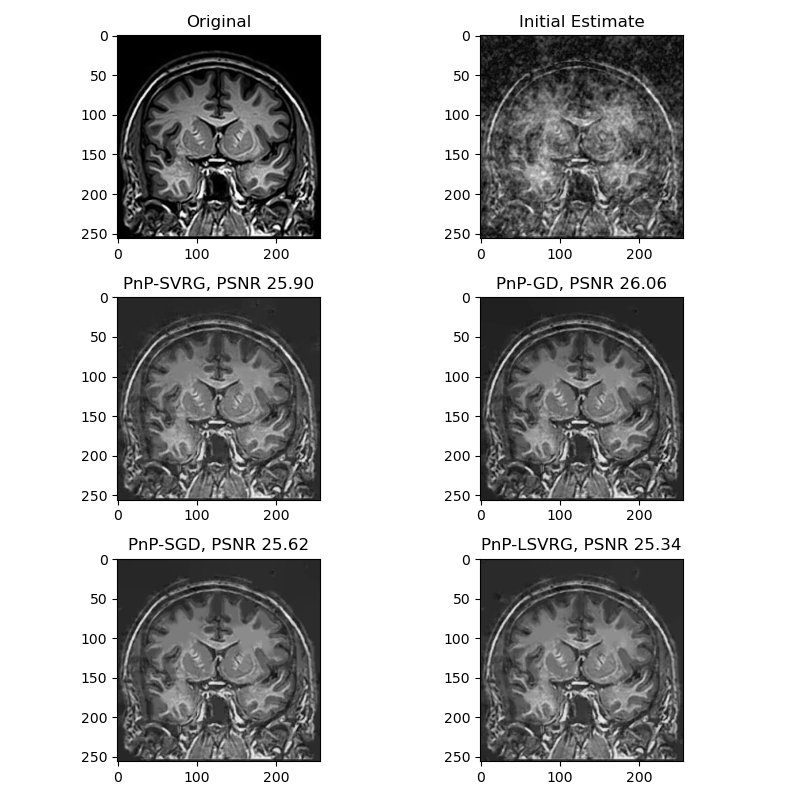

In [19]:
show_grid([torch.Tensor(main_problem['original']), torch.Tensor(main_problem['noisy']), 
           torch.Tensor(z_SVRG), torch.Tensor(z_GD), torch.Tensor(z_SGD), torch.Tensor(z_LSVRG)], ['Original','Initial Estimate',"PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG), "PnP-GD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_GD), "PnP-SGD, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SGD), "PnP-LSVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_LSVRG)], figsize=(8,8))
# show_grid([torch.Tensor(main_problem['original']), torch.Tensor(main_problem['noisy']), torch.Tensor(z_SVRG)], ['Original','Initial Estimate',"PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem['original'], z_SVRG)], figsize=(8,8))

<IPython.core.display.Javascript object>


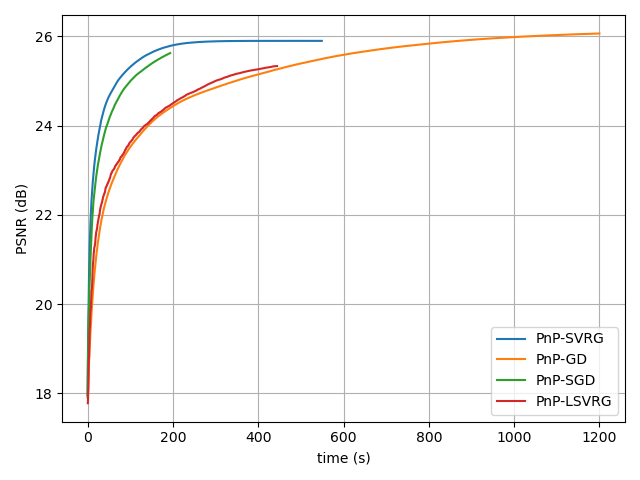

In [20]:
# Figure to display iteration count/ clock time vs PSNR for all algorithms
psnr_fig = plt.figure()
psnr_ax = psnr_fig.add_subplot(1, 1, 1)

psnr_ax.plot(np.cumsum(time_SVRG), psnr_SVRG)
psnr_ax.plot(np.cumsum(time_GD), psnr_GD)
psnr_ax.plot(np.cumsum(time_SGD), psnr_SGD)
psnr_ax.plot(np.cumsum(time_LSVRG), psnr_LSVRG)

psnr_ax.set(xlabel='time (s)', ylabel='PSNR (dB)')
psnr_ax.legend(('PnP-SVRG', 'PnP-GD', 'PnP-SGD', 'PnP-LSVRG'), loc='lower right')
psnr_ax.grid()

psnr_fig.tight_layout()

plt.show()

## Figure 3: Compare Image Denoising Routines with PnP-SVRG

In [ ]:
main_problem = create_problem(noise_est=0.8, H=256, W=256, sigma=5, filter_decay=0.999)

In [ ]:
z_SVRG_nlm, time_SVRG_nlm, psnr_SVRG_nlm, zs_SVRG_nlm = pnp_svrg(res, 'nlm', eta=2000, T1=400, T2=5, mini_batch_size=50, verbose=True)

In [ ]:
z_SVRG_tv, time_SVRG_tv, psnr_SVRG_tv, zs_SVRG_tv = pnp_svrg(res, 'tv', eta=2000, T1=400, T2=5, mini_batch_size=50, verbose=True)

In [ ]:
z_SVRG_bm3d, time_SVRG_bm3d, psnr_SVRG_bm3d, zs_SVRG_bm3d = pnp_svrg(res, 'bm3d', eta=2000, T1=400, T2=5, mini_batch_size=50, verbose=True)

In [ ]:
z_SVRG_cnn, time_SVRG_cnn, psnr_SVRG_cnn, zs_SVRG_cnn = pnp_svrg(res, 'cnn', eta=2000, T1=400, T2=5, mini_batch_size=50, verbose=True)

In [ ]:
show_grid([torch.Tensor(res['original']), torch.Tensor(res['noisy']), 
           torch.Tensor(z_SVRG_nlm), torch.Tensor(z_SVRG_tv), torch.Tensor(z_SVRG_bm3d), torch.Tensor(z_SVRG_cnn)], ['Original','Initial Estimate','NLM','TV','BM3D','CNN'], figsize=(8,8))

## Figure 4: Compare Sampling Ratio for each PnP Algorithm

In [ ]:
num_probs = 10
num_trials = 3
sample_probs = np.linspace(.1, 1, num_probs)

prob_vs_psnr_SVRG = []

prob_vs_psnr_GD = []
prob_vs_psnr_SGD = []
prob_vs_psnr_LSVRG = []

for i in range(num_probs):
    samp_ratio_SVRG = []
    samp_ratio_GD = []
    samp_ratio_SGD = []
    samp_ratio_LSVRG = []
    for j in range(num_trials):
        samp_ratio_problem = create_problem(noise_est=0.8, H=256, W=256, sigma=5, filter_decay=0.999, sample_prob=sample_probs[i])
        
        z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(samp_ratio_problem, 'nlm', eta=2000, T1=400, T2=5, mini_batch_size=50, verbose=True)
        samp_ratio_SVRG.append(psnr_SVRG[-1])

        z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(samp_ratio_problem, 'nlm', eta=2000, T=1000, verbose=True)
        samp_ratio_GD.append(psnr_GD[-1])

        z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(samp_ratio_problem, 'nlm', eta=2000, T=1000, mini_batch_size=5000, verbose=True)
        samp_ratio_SGD.append(psnr_SGD[-1])

        z_LSVRG, time_LSVRG, psnr_LSVRG, zs_LSVRG = pnp_lsvrg(samp_ratio_problem, 'nlm', eta=1000, T=2000, mini_batch_size=50, prob_update=.2, verbose=True)
        samp_ratio_LSVRG.append(psnr_LSVRG[-1])
    prob_vs_psnr_SVRG.append(np.average(samp_ratio_SVRG))
    prob_vs_psnr_GD.append(np.average(samp_ratio_GD))
    prob_vs_psnr_SGD.append(np.average(samp_ratio_SGD))
    prob_vs_psnr_LSVRG.append(np.average(samp_ratio_LSVRG))
# PLOT CURVES

In [ ]:
# Figure to display iteration count/ clock time vs PSNR for all algorithms
psnr_fig = plt.figure()
psnr_ax = psnr_fig.add_subplot(1, 1, 1)

psnr_ax.plot(sample_probs, prob_vs_psnr_SVRG)
psnr_ax.plot(sample_probs, prob_vs_psnr_GD)
psnr_ax.plot(sample_probs, prob_vs_psnr_SGD)
psnr_ax.plot(sample_probs, prob_vs_psnr_LSVRG)

psnr_ax.set(xlabel='time (s)', ylabel='PSNR (dB)')
psnr_ax.legend(('PnP-SVRG', 'PnP-GD', 'PnP-SGD', 'PnP-LSVRG'), loc='lower right')
psnr_ax.grid()

psnr_fig.tight_layout()

plt.show()